In [1]:
import numpy as np
import math, json
from rdp import rdp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import tqdm.notebook as tq
import pickle
from collections import defaultdict
import cairosvg
from PIL import Image,ImageDraw
import glob
import os 
import re
import svgwrite

In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
def get_bounds(data):
    minx, miny = 600, 600  
    maxx, maxy = 0, 0
    
    for i, (x, y, z) in enumerate(data): 
        if minx > x:
            minx = x
        if miny > y:
            miny = y 

        if maxx < x:
            maxx = x
        if maxy < y:
            maxy = y 
    return minx, maxx, miny, maxy

In [3]:
def convert_3d(drawing, return_flag = False, threshold=10):
    out = []
    corrupted = False
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) == 1:
            x, y = stroke[0]
            out.append([x, y, 0])
            out.append([x+5, y+5, 1])
            continue
        segment = []
        for i, point in enumerate(stroke):
            x, y = point 
            if i == len(stroke) - 1:
                segment.append([x, y, 1])
            else:
                segment.append([x, y, 0])
        
        start = 0 
        for i, point in enumerate(segment):
            if i < len(segment) -1:
                x, y, _ = point
                next_x, next_y, _ = segment[i+1]
                if any((
                    abs(x-next_x)>threshold,
                    abs(y-next_y>threshold),
                )):
                    corrupted=True
                    start = i +1
        
        out += segment[start:]
    if return_flag:
        return out, corrupted
    return out

In [4]:
def make_square(im, min_size=256, fill_color=(255, 255, 255)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [5]:
def draw_strokes(data, factor=1, svg_filename = 'tmp/sample.svg', stroke_width = 3, square = False, return_res = False):
    min_x, max_x, min_y, max_y = get_bounds(data)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)
    dwg = svgwrite.Drawing(svg_filename, size = dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    lift_pen = 1
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)
    command = "M"
    for i in range(len(data)):
        if (lift_pen == 1):
            command = "M"
        elif (command != "L"):
            command = "L"
        else:
            command = ""
        x = float(data[i][0]) - min_x
        y = float(data[i][1]) - min_y
        lift_pen = data[i][2]
        p += command+str(x)+" "+str(y)+" "
    the_color = "black"
    
    dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
    dwg.save()
    cairosvg.svg2png(url="tmp/sample.svg", write_to="tmp/sample.png")
    img = Image.open('tmp/sample.png')
    if square:
        img = make_square(img)
    if return_res:
        return img, dims 
    else:
        return img

In [11]:
npy_files = glob.glob('server/data/*')
file = np.random.choice(npy_files)

In [43]:
target_file_name + '_'+ ctr +'.json' in [f.split('/')[-1] for f in glob.glob('dataset/**/**.json')]

False

In [ ]:
files = glob.glob('server/data/*') + glob.glob('server/larger_data/*')
shuffle(files)

In [113]:
!rm -r dataset

In [114]:
def preprocess(text):
    char_comps = []
    
    diacritics = "[ًٌٍَُِّْ]"
    numbers = '0123456789'
    for diac in diacritics: 
        text = text.replace(diac, '')

    text = re.sub('[0-9]', '', text)
    text = re.sub('[a-zA-Zö\xa0]', '', text)
    return text.replace('_', '')

In [115]:
import shutil 
import glob 
from random import  shuffle
os.makedirs('dataset', exist_ok = True)
os.makedirs('dataset/train', exist_ok = True)
os.makedirs('dataset/valid', exist_ok = True)
os.makedirs('dataset/test', exist_ok = True)

for i, file in enumerate(files):
    file_name = file.split('/')[-1][:-5]
    
    target_file_name = preprocess(file_name) 
    ctr = str(0)
        
    while target_file_name + '_'+ ctr +'.json' in [f.split('/')[-1] for f in glob.glob('dataset/**/**.json')]:
        ctr = str(int(ctr) + 1) 

    target_file_name = target_file_name + '_'+ ctr 

    if i < 2000:
        shutil.copyfile(file, f'dataset/train/{target_file_name}.json')
    elif i < 2250:
        shutil.copyfile(file, f'dataset/valid/{target_file_name}.json')
    elif i < 2500:
        shutil.copyfile(file, f'dataset/test/{target_file_name}.json')
    else:
        break 

In [116]:
len(glob.glob('dataset/**/**.json'))

2500

In [117]:
file

'server/data/Benyaagoub_بن يعقوب.json'

زنيرة


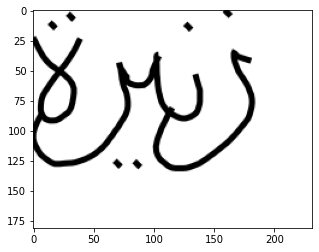

In [118]:
file = np.random.choice(glob.glob('dataset/**/**.json'))
print(file.split('_')[0].split('/')[-1])
drawing = json.load(open(file))
data1, flag = convert_3d(drawing, return_flag=True, threshold=50)
plt.imshow(draw_strokes(data1, stroke_width = 5))
plt.show()

In [119]:
#https:#jrgraphix.net/r/Unicode/0600-06FF
map_chars = {
    "\u0623":["\u0621", "\u0627"], # أ
    "\u0622":["\u0605", "\u0627"], # آ
    "\u0625":["\u0627", "\u0621"], # إ
    "\u0628":["\u066E", "."], # ب
    "\u062A":[".", ".", "\u066E"], # ت
    "\u062B":[".", ".", ".", "\u066E"], # ث 
    "\u062C":["\u062D", "."], # ج
    "\u062E":[".", "\u062D"], # خ
    "\u0630":[".", "\u062F"], # ذ
    "\u0632":[".", "\u0631"], # ز
    "\u0634":[".", ".", ".", "\u0633"], # ش
    "\u0636":[".", "\u0635"], # ض
    "\u0637":["\u0627", "\uFEBB"], # ط
    "\u0638":[".", "\u0627", "\uFEBB"], # ظ
    "\u063A":[".", "\u0639"], # غ
    "\u0641":[".", "\u066F"], # ف
    "\u0642":[".", ".", "\u066F"], # ق
    "\u06A4":[".", ".", ".", "\u066F"], # ڤ
    "\u0643":["\u0621", "\u0644"], # ك
    "\u0646":[".", "\u06BA"], # ن
    "\u0624":["\u0621", "\u0648"], # ؤ
    "\u064A":["\u0649", ".", "."], #ي
    "\u0626":["\u0621", "\u0649"], #ئ
    "\u0629":[".", ".", "\u0647"], #ه
}

In [120]:
file.split('_')[0].split('/')[-1]

'زنيرة'

In [121]:
from collections import Counter 
char_counts = Counter()

for split in ['train', 'valid', 'test']:
    num_chars = 0 
    num_words = 0 
    num_strks = 0 
    num_sents = 0 
    for file in glob.glob(f'dataset/{split}/**.json'):
        text = file.split('_')[0].split('/')[-1]
        for char in text:
            if char == ' ':
                continue
            char_counts[char] += 1
            if char in map_chars:
                num_strks += len(map_chars[char])
            else:
                num_strks += 1

        num_chars += len(text.replace(' ', ''))
        num_words += len(text.split(' '))
        num_sents += 1
    
    print(split)
    print('number of words ', num_words)
    print('number of characters ', num_chars)
    print('number of strokes ', num_strks)
    print('number of sentences', num_sents)

train
number of words  6065
number of characters  24722
number of strokes  36561
number of sentences 2000
valid
number of words  738
number of characters  2946
number of strokes  4410
number of sentences 250
test
number of words  753
number of characters  3052
number of strokes  4601
number of sentences 250


In [122]:
char_counts

Counter({'أ': 426,
         'ح': 944,
         'م': 2436,
         'د': 875,
         'ي': 2089,
         'س': 758,
         'ر': 1704,
         'ى': 272,
         'ف': 609,
         'ا': 4530,
         'ئ': 56,
         'ز': 199,
         'ل': 4382,
         'ه': 1332,
         'ص': 182,
         'خ': 245,
         'ش': 236,
         'ء': 128,
         'ذ': 190,
         'ك': 832,
         'و': 1626,
         'ن': 1879,
         'ق': 504,
         'ة': 344,
         'ب': 1137,
         'ع': 1006,
         'ظ': 62,
         'ؤ': 31,
         'آ': 58,
         'إ': 242,
         'ج': 292,
         'غ': 95,
         'ت': 682,
         'ض': 131,
         'ط': 129,
         'ث': 72,
         'ڤ': 5})

In [139]:
import pandas as pd
df = pd.DataFrame(char_counts.items(), columns=['Char', 'Count'])

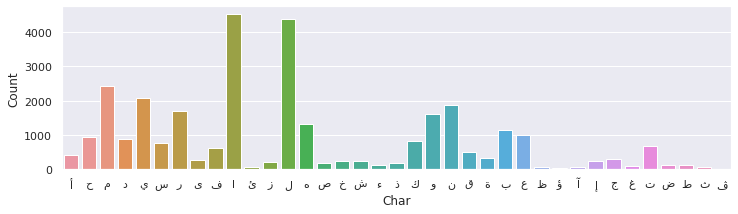

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
ax = sns.barplot(y = 'Count', x ='Char', data = df)

In [73]:
def preprocess(text):
    char_comps = []
    
    diacritics = "[ًٌٍَُِّْ]"
    numbers = '0123456789'
    for diac in diacritics: 
        text = text.replace(diac, '')

    for num in numbers: 
        text = text.replace(num, '')
    
    outText = ""
    
    for i in range(len(text)):
    
        if (text[i] == " "):
            continue
    
        if text[i] in map_chars:
            if (i < len(text) - 1 and text[i] == "\u0643"):
                if text[i+1] != ' ':
                    char_comps.append({text[i] : '\uFEDB'})
                    outText += '\uFEDB'
                else:
                    char_comps.append({text[i] : map_chars[text[i]]})
                    outText += ''.join(map_chars[text[i]])
            else:
                char_comps.append({text[i] : map_chars[text[i]]})
                outText += ''.join(map_chars[text[i]])
        else:
                char_comps.append({text[i] : text[i]})
                outText += text[i]

    return char_comps, outText

In [42]:
def concatenate(images, mode='h', margin=10):
    widths, heights = zip(*(i.size for i in images))
    if mode =='h':
        total_width = sum(widths)
        max_height = max(heights)

        new_im = Image.new('RGB', (total_width, max_height), (255, 255, 255))

        x_offset = 0
        for im in images[::-1]:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
    elif mode == 'v':    
        total_height = sum(heights)
        max_width = max(widths)

        new_im = Image.new('RGB', (max_width, total_height+margin*(len(images)-1)), (255, 255, 255))
        draw = ImageDraw.Draw(new_im)
        y_offset = 0
        for im in images:
            new_im.paste(im, (0,y_offset+margin))
            y_offset += im.size[1]
            draw.line((0,y_offset+margin-5, max_width,y_offset+margin-5), fill=(0, 0, 0), width=3)
    return new_im

In [43]:
def generate_characters(file):
    char_drawings = []
    annot = file.split('/')[-1][:-5]
    char_comps = preprocess(annot)
    drawing = json.load(open(file))
    new_drawing = apply_rdb(drawing, verbose = 0)
    i = 0 
    for comp in char_comps:
        char = list(comp.keys())[0]
        j = i + len(comp[char])
        char_drawings.append({char:new_drawing[i:j]})
        i = j 
    return char_drawings

In [53]:
import glob
npy_files = glob.glob('server/larger_data/*')
file = np.random.choice(npy_files)

In [57]:
len(glob.glob('server/larger_data/*'))

1800

In [91]:
wrong_annotations = []
for file in glob.glob('server/data/*'):
    drawing = json.load(open(file))
    stroke_chars = ''
    _, original_stroke_chars = preprocess(file.split("/")[-1][:-5].split('_')[-1])
    for comp in drawing:
        stroke_chars += list(comp.keys())[0]
    if stroke_chars != original_stroke_chars:
        print(file)
        print(stroke_chars)
        print(original_stroke_chars)
        wrong_annotations.append(file)
        data1, flag = convert_3d(drawing, return_flag=True, threshold=50)
        plt.imshow(draw_strokes(data1, stroke_width = 5))
        plt.show()

In [95]:
len(glob.glob('server/larger_data/*') + glob.glob('server/data/*'))

2417

In [117]:
len(glob.glob('server/static/processed_larger_images/*') + glob.glob('server/static/images/*'))

2500

In [118]:
wrong_annotations = []
for file in glob.glob('server/larger_data/*'):
    drawing = json.load(open(file))
    stroke_chars = ''
    _, original_stroke_chars = preprocess(file.split("/")[-1][:-5])
    for comp in drawing:
        stroke_chars += list(comp.keys())[0]
    if stroke_chars != original_stroke_chars:
        print(file)
        print(stroke_chars)
        print(original_stroke_chars)
        wrong_annotations.append(file)
        data1, flag = convert_3d(drawing, return_flag=True, threshold=50)
        plt.imshow(draw_strokes(data1, stroke_width = 5))
        plt.show()

In [119]:
wrong_annotations

[]

In [71]:
import os
import shutil

for file in wrong_annotations:
    file_name = file.split('/')[-1][:-5]
    os.remove(file)  
    shutil.move(f'server/static/processed_larger_images/{file_name}.jpg', f'server/static/larger_images/{file_name}.jpg')

In [90]:
import os
import shutil

for file in wrong_annotations:
    file_name = file.split("/")[-1][:-5]
    new_image_name = file.split("/")[-1][:-5].split('_')[-1]
    try:
        os.remove(file)  
        shutil.move(f'server/static/images/{file_name}.jpg', f'server/static/larger_images/{new_image_name}.jpg')
    except:
        continue

In [109]:
!ls server/larger_data/ | wc -l

1818
